In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2023/2/16 13:32

@author: Susan
"""
from pt_utils.PairOn import PairOn
from pt_utils.get_data_sql import PairTradingData
from pt_utils.Trading import Trading, TradingFrequency
from pt_utils.function import get_current_date
import pandas as pd
import os

start_date = '2012-01-01'
end_date = '2022-11-29'

form_end = '2018-07-01'
form_freq = TradingFrequency.month
form_freq_num = -1

trans_start = '2018-07-01'
trans_freq = TradingFrequency.month
trans_freq_num = 1

pair_num = 20
c = 0.0015
pair_bar = 0.02

amount = 1e7
index_sid = '000906.SH'

project_path = os.getcwd()
today = get_current_date()
index_df = PairTradingData.get_index_data(start_date, end_date)
index_df.index = pd.to_datetime(index_df.index)
trade_out_folder = f"""{project_path}/result_bar_{today}/{form_end}_{form_freq_num}{str(form_freq).split('.')[-1]}_{trans_start}_{trans_freq_num}{str(trans_freq).split('.')[-1]}/"""

# %%
pt_db = PairOn(form_end, form_freq, form_freq_num, out_folder=trade_out_folder + 'formation/', pair_bar=pair_bar)
pair = pt_db.run_pairOn(pair_num)
pair_entry_dict = pt_db.run_opt_pair_entry_level(pair, c)

# %%
trade = Trading(pair_entry_dict, pair_bar, trans_start, trans_freq, trans_freq_num,
                out_folder=trade_out_folder + 'transaction/')
rev_df = trade.run(trade_out_folder, amount)


stock_pool cost time 7.050373554229736 s


run_pairOn cost time 9.850391387939453 s


run_opt_pair_entry_level cost time 13.282362699508667 s


run cost time 65.93481779098511 s



Start date,2018-07-03
End date,2018-07-31
Total months,1
,Backtest
Annual return,1.752%
Cumulative returns,0.145%
Annual volatility,4.593%
Sharpe ratio,0.40
Calmar ratio,0.97
Stability,0.19
Max drawdown,-1.797%


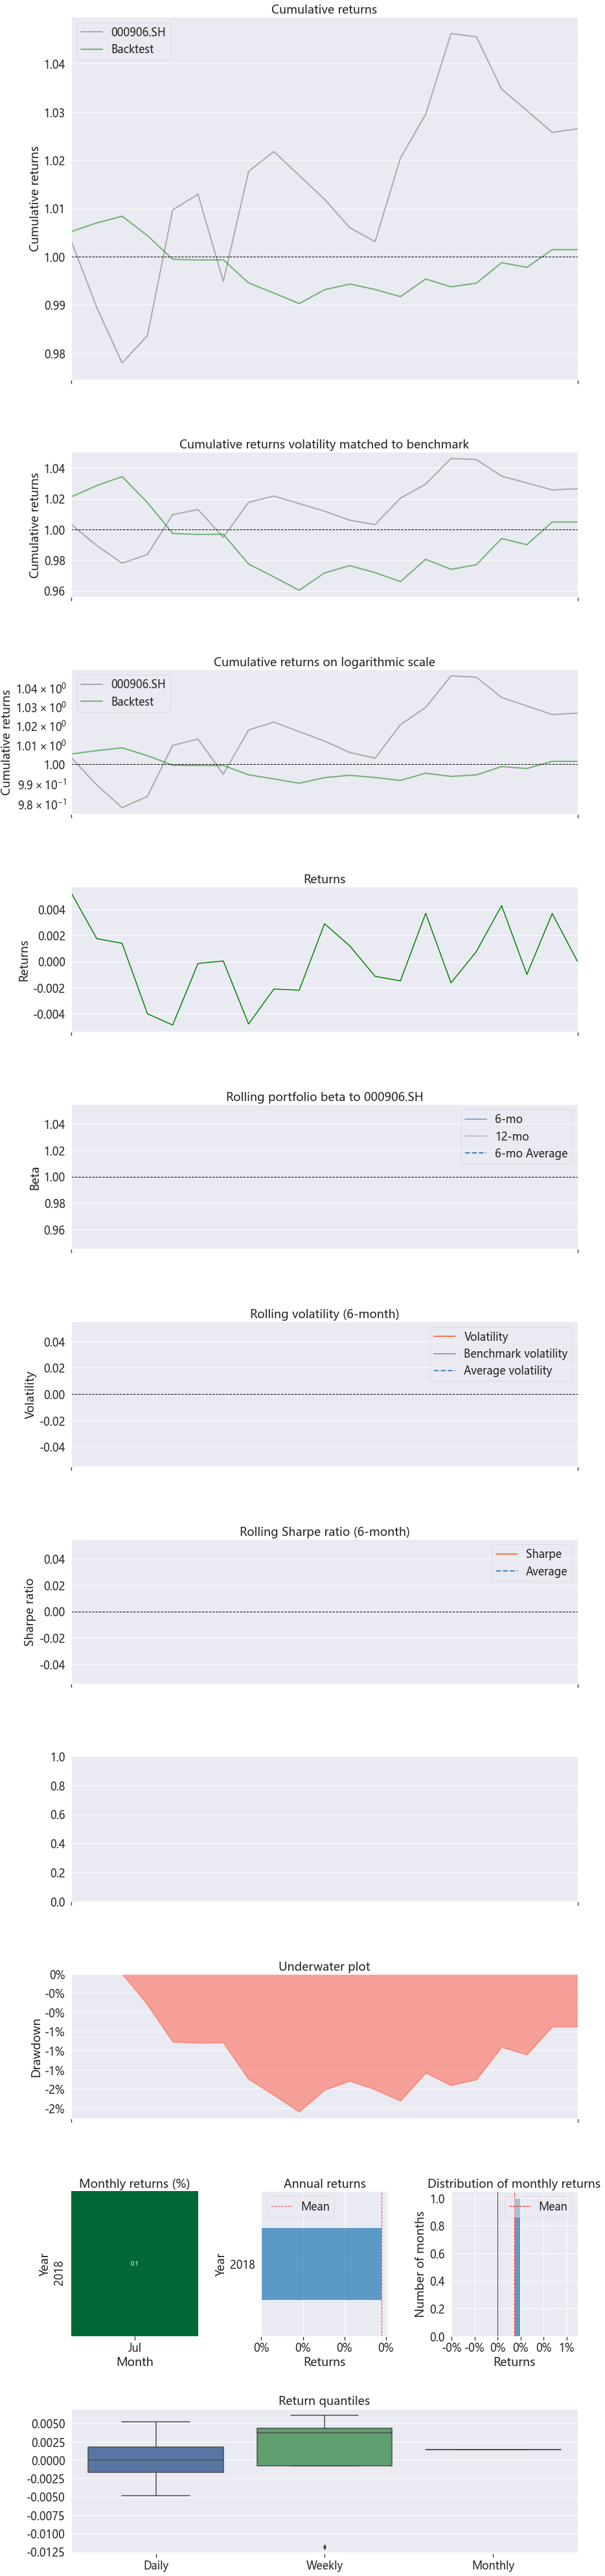

In [3]:
# %%
bm_data = trade.evaluation(rev_df, index_df, index_sid)
